In [1]:
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import plotly.express as px
import os
import sys
import plotly.graph_objects as go 
dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')
from labbiofisica import final_val

In [2]:
path = dir_path+'/data/'

spettri = pd.DataFrame()
for i in ['0','1','2','3','4','5']:
    c = 'C' + i
    data = pd.read_csv(path + c + '.dat',header = None, skiprows=1,sep='\t')
    
    spettri['λ'] = data.iloc[:, 0]
    spettri[c] = data.iloc[:,1]

spettri.tail()

,λ,C0,C1,C2,C3,C4,C5
55,205,-0.02454,-0.02172,-0.02031,-0.02233,-0.01931,-0.01872
56,204,-0.02265,-0.01981,-0.02289,-0.02221,-0.02085,-0.01986
57,203,-0.02256,-0.01913,-0.02492,-0.02548,-0.01868,-0.02221
58,202,-0.02118,-0.02115,-0.02197,-0.02395,-0.02055,-0.02537
59,201,-0.01932,-0.02146,-0.02278,-0.01982,-0.02226,-0.02139


In [3]:
N = 162 #numero residui BLG
l = 0.5 # lunghezza cammino ottico in cm
R = 8.314 # J/(mol * K)
T = 300 # K

In [4]:
# import concentrazioni
concentrazioni = pd.read_csv('concentrazioni_soluzioni.csv')['C(GuHCl) [M] sperimentale'].to_numpy() * 1000000 # μM
print('Concentrazione GuHCl [μM]: ',concentrazioni)

Concentrazione GuHCl [μM]:  [0.      1.56847 3.08505 4.60239 6.18847 7.73319]


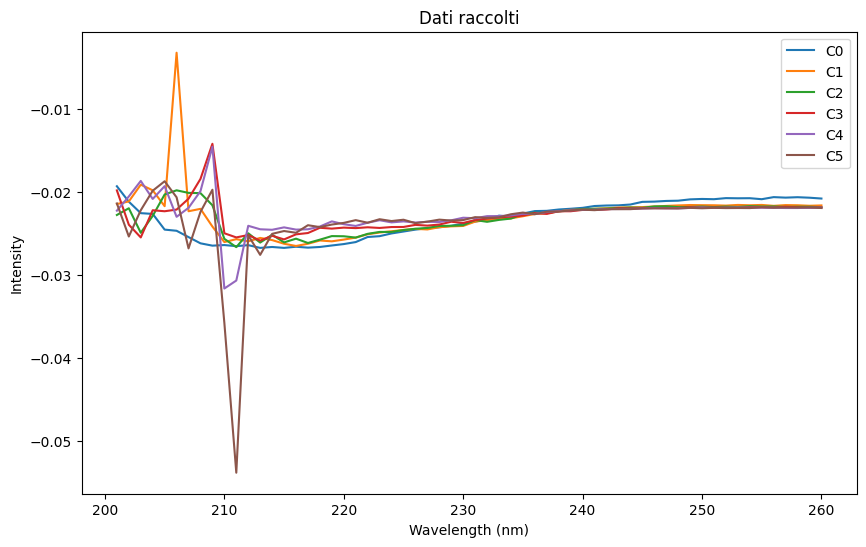

In [5]:
plt.figure(figsize=(10, 6))
for conc in ['C0', 'C1', 'C2','C3', 'C4', 'C5']:
    plt.plot(spettri['λ'], spettri[conc], label=conc)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.title('Dati raccolti')
plt.legend()
plt.show()

### APPAIO LE CODE

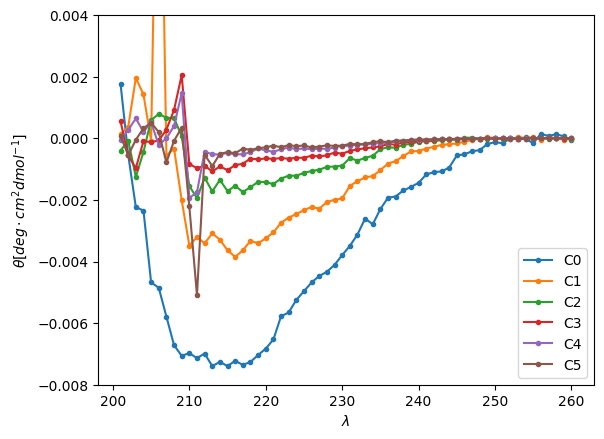

In [6]:
for i,conc in enumerate(['C0','C1', 'C2','C3', 'C4', 'C5']):
    λ =  spettri['λ']
    if i != 0:
        θ = spettri[conc]*100/(concentrazioni[i]*N*l)
    else:
        θ = spettri[conc]*100/(N*l)

    mean = θ[λ > 250].mean()
    θ -= mean
    spettri[conc] = θ # diviso per la concentrazione e code appaiate a zero
    plt.plot(λ,θ,marker='.',label=conc)

plt.ylim([-0.008,+0.004])
plt.xlabel('$\\lambda$')
plt.ylabel('$\\theta [deg\\cdot cm^2 dmol^{-1}]$')
plt.legend()
plt.show()

In [7]:
λ = spettri['λ']

λmin = 220
λmax = 230

imin,imax = λ[λ == λmin].index[0], λ[λ == λmax].index[0]
# print(imin,imax)

Λ = np.arange(λmax,λmin-1,-1)

# Seleziona solo le colonne delle concentrazioni (senza le colonne λ)
spettro_ristretto = spettri.loc[imax:imin, ['C0','C1', 'C2', 'C3', 'C4', 'C5']]
spettro_ristretto = spettro_ristretto.T
spettro_ristretto.columns = Λ
spettro_ristretto.insert(0, 'Concentrazione', spettro_ristretto.index)
spettro_ristretto.reset_index(drop=True, inplace=True)
spettro_ristretto['Concentrazione'] = concentrazioni
display(spettro_ristretto)


,Concentrazione,230,229,228,227,226,225,224,223,222,221,220
0,0.00000,-0.003790,-0.004111,-0.004333,-0.004469,-0.004679,-0.004963,-0.005247,-0.005654,-0.005778,-0.006531,-0.006827
1,1.56847,-0.001953,-0.001992,-0.002071,-0.002283,-0.002228,-0.002331,-0.002457,-0.002575,-0.002740,-0.003055,-0.003244
2,3.08505,-0.000889,-0.000917,-0.000925,-0.001021,-0.001061,-0.001121,-0.001213,-0.001213,-0.001305,-0.001485,-0.001421
3,4.60239,-0.000501,-0.000461,-0.000552,-0.000587,-0.000563,-0.000630,-0.000633,-0.000662,-0.000641,-0.000668,-0.000652
4,6.18847,-0.000239,-0.000301,-0.000341,-0.000337,-0.000355,-0.000327,-0.000351,-0.000299,-0.000359,-0.000436,-0.000395
5,7.73319,-0.000237,-0.000246,-0.000229,-0.000267,-0.000296,-0.000230,-0.000256,-0.000221,-0.000288,-0.000238,-0.000291


In [8]:
# fig = go.Figure()
colors = px.colors.sample_colorscale(px.colors.sequential.Plasma, len(Λ))

# for idx,i in enumerate(range(λmin,λmax)):
#     fig.add_trace(go.Scatter(
#         x=spettro_ristretto['Concentrazione'],
#         y=spettro_ristretto[i],
#         mode='lines+markers',
#         name=str(i)+'nm',
#         line=dict(color=colors[idx]),
#         marker=dict(color=colors[idx])
#     ))

# fig.update_layout(
#     # yaxis_type='log',
#     #title='Spettri ristretti (220-230 nm)',
#     xaxis_title='Concentrazione [μM]',
#     yaxis_title='θ',
#     legend_title='λ [nm]',
#     height=800,
#     width=600,
#     legend=dict(
#         x=1,
#         y=0,
#         xanchor='right',
#         yanchor='bottom'
#     )
# )
# # fig.show()

In [9]:
def sigmoid(x, yN,yD,A,Cmid):
    expo = A * (Cmid-x)
    num = yN + yD * np.exp(expo)
    den = 1 + np.exp(-expo)
    return num/den


# x = np.linspace(0,6,1000)
# plt.plot(x,sigmoid(x,-0.005,-0.0001,2,6))

# plt.show()

In [20]:
# fit con sigmoide

fit_results = []

for i in spettro_ristretto.columns[1:]:
    C = concentrazioni
    θ = spettro_ristretto[i].to_numpy()

    # guess
    yD = θ[-1]
    yN = θ[0] # NON è UN PARAMETRO
    A = 0.5
    Cmid = np.mean(C)

    # fit
    popt, pcov = curve_fit(lambda x,yD,A,Cmid: sigmoid(x,yN,yD,A,Cmid), C, θ, p0=[yD, A, Cmid],maxfev=1000,)
    perr = np.sqrt(np.diag(pcov))
    fit_results.append({
        'λ': i,
        # 'yN': popt[0], 'yN_err': perr[0],
        'yD': popt[0], 'yD_err': perr[0],
        'A': popt[1], 'A_err': perr[1],
        'Cmid': popt[2], 'Cmid_err': perr[2]
    })

fit_df = pd.DataFrame(fit_results)
display(fit_df)

,λ,yD,yD_err,A,A_err,Cmid,Cmid_err
0,230,-0.075175,0.556654,0.275582,0.200272,-5.411417,17.376294
1,229,-0.036806,0.466999,0.317500,0.522288,-3.450013,25.668330
2,228,-0.031486,0.651336,0.327711,0.937987,-3.027916,40.230220
3,227,-0.045346,0.514020,0.298211,0.420607,-3.878370,24.493412
4,226,-0.034859,0.653706,0.323568,0.833230,-3.106977,36.977039
5,225,-0.034046,0.399294,0.331827,0.547900,-2.905010,22.466840
6,224,-0.037152,0.392139,0.330174,0.485964,-2.967849,20.350039
7,223,-0.040010,0.342656,0.345478,0.412560,-2.833563,15.778668
8,222,-0.058638,0.360068,0.318073,0.243091,-3.641612,12.440522
9,221,-0.086968,0.330429,0.312281,0.134710,-4.144256,7.873980


In [21]:
fig = go.Figure()

C_plot = np.linspace(concentrazioni.min()-40, concentrazioni.max()+40, 200)

for idx, row in fit_df.iterrows():
    yN = spettro_ristretto.loc[0, row['λ']]
    yD = row['yD']
    A = row['A']
    Cmid = row['Cmid']
    θ_fit = sigmoid(C_plot, yN, yD, A, Cmid)
    # Fit line
    fig.add_trace(go.Scatter(
        x=C_plot,
        y=θ_fit,
        mode='lines',
        line=dict(color=colors[idx]),
        name=f"Fit {int(row['λ'])} nm"
    ))
    # Experimental points
    fig.add_trace(go.Scatter(
        x=spettro_ristretto['Concentrazione'],
        y=spettro_ristretto[row['λ']],
        mode='markers',
        marker=dict(color=colors[idx]),
        name=f"Exp {int(row['λ'])} nm",
        showlegend=False
    ))

fig.update_layout(
    xaxis_title='Concentrazione [μM]',
    yaxis_title='θ (fit)',
    legend_title='λ [nm]',
    height=600,
    width=800,
    legend=dict(
        x=1,
        y=0,
        xanchor='right',
        yanchor='bottom'
    )
)

fig.show()

In [12]:
# Extract Cmid and its error
Cmid_values = fit_df['Cmid']
Cmid_errors = fit_df['Cmid_err']

# Compute mean and standard error of the mean
weights = 1/Cmid_errors**2
mean_Cmid = np.average(Cmid_values, weights=weights)
mean_Cmid_err = np.sqrt(np.sum(weights*((Cmid_values-mean_Cmid)**2))/np.sum(weights))



fig = go.Figure()

# markers
fig.add_trace(go.Scatter(
    x=fit_df['λ'],
    y=Cmid_values,
    error_y=dict(type='data', array=Cmid_errors, visible=True),
    mode='markers',
    name='Cmid'
))

mean_line_points = np.concatenate([[219],fit_df['λ'],[231]])
# mean dashed line
fig.add_trace(go.Scatter(
    x= mean_line_points,
    y=[mean_Cmid]*len(mean_line_points),
    mode='lines',
    line=dict(color='red', dash='dash'),
    name='Mean Cmid'
))

# bottom
fig.add_trace(go.Scatter(
    x=mean_line_points,
    y=[mean_Cmid - mean_Cmid_err]*len(mean_line_points),
    mode='lines',
    line=dict(color='red', width=0),
    showlegend=False
))
#top
fig.add_trace(go.Scatter(
    x=mean_line_points,
    y=[mean_Cmid + mean_Cmid_err]*len(mean_line_points),
    mode='lines',
    fill='tonexty',
    fillcolor='rgba(255,0,0,0.2)',
    line=dict(color='red', width=0),
    name='Mean ± SEM'
))

fig.update_layout(
    xaxis_title='λ [nm]',
    yaxis_title='Cmid',
    # title='Cmid vs λ with Mean and SEM',
    legend_title='Legend',
    legend=dict(
        x=1,
        y=1,
        xanchor='right',
        yanchor='top'
    )
)

fig.show()

In [13]:
# Extract m and its error
A_values = fit_df['A']
A_errors = fit_df['A_err']

# Compute mean and standard error of the mean
weights_A = 1 / A_errors**2
mean_A = np.average(A_values, weights=weights_A)
mean_A_err = np.sqrt(np.sum(weights_A * ((A_values - mean_A) ** 2)) / np.sum(weights_A))

fig = go.Figure()

# markers with error bars
fig.add_trace(go.Scatter(
    x=fit_df['λ'],
    y=A_values,
    error_y=dict(type='data', array=A_errors, visible=True),
    mode='markers',
    name='A'
))

mean_line_points = np.concatenate([[λmin-1], fit_df['λ'], [λmax+1]])
# mean dashed line
fig.add_trace(go.Scatter(
    x=mean_line_points,
    y=[mean_A]*len(mean_line_points),
    mode='lines',
    line=dict(color='red', dash='dash'),
    name='Mean A'
))

# bottom
fig.add_trace(go.Scatter(
    x=mean_line_points,
    y=[mean_A - mean_A_err]*len(mean_line_points),
    mode='lines',
    line=dict(color='red', width=0),
    showlegend=False
))
# top
fig.add_trace(go.Scatter(
    x=mean_line_points,
    y=[mean_A + mean_A_err]*len(mean_line_points),
    mode='lines',
    fill='tonexty',
    fillcolor='rgba(255,0,0,0.2)',
    line=dict(color='red', width=0),
    name='Mean ± SEM'
))

fig.update_layout(
    xaxis_title='λ [nm]',
    yaxis_title='A',
    legend_title='Legend',
    legend=dict(
        x=1,
        y=1,
        xanchor='right',
        yanchor='top'
    )
)

fig.show()


In [24]:
# stampa medie

# print("Media pesata di Cmid:", mean_Cmid)
# print("Errore sulla media pesata di Cmid:", mean_Cmid_err)
# print("Media pesata di m:", mean_A)
# print("Errore sulla media pesata di m:", mean_A_err)

print('Cmid: ',final_val(mean_Cmid,mean_Cmid_err,4,udm='μM'))
print('A: ',final_val(mean_A,mean_A_err,3,udm='μM^-1'))

m = mean_A/(R*T*1000000)
err_m = mean_A_err/(R*T*1000000)


print('m: ', final_val(m,err_m,exp=-10, udm='LJ/mol2'))

ΔG = m * mean_Cmid/1000000
sigmaΔG = ΔG*np.sqrt((err_m/m)**2 + (mean_Cmid_err/mean_Cmid)**2)

print(ΔG,sigmaΔG)

Cmid:  -1.0433 ± 1.1295 μM
A:  0.348 ± 0.062 μM^-1
m:  (1.39 ± 0.25)e-10 LJ/mol2
-1.4546489585386078e-16 -1.5961375314460796e-16
